This notebook was created, and made public, only to provide background to a reply I made on a Topic post. Its function is to produce some *very* approximate numbers, and nothing more. 

In [1]:
import pandas as pd
import re
# count the number of forum Topics that contain the word "sheet" in the Title:
forumTopics_df = pd.read_csv('../input/meta-kaggle/ForumTopics.csv')
number = forumTopics_df.Title.str.count("sheet", re.I).sum()
print("Estimated number of cheat sheet posts on kaggle: %i" % number)

Estimated number of cheat sheet posts on kaggle: 446


visualise the subject matter as a $\pi$-chart:

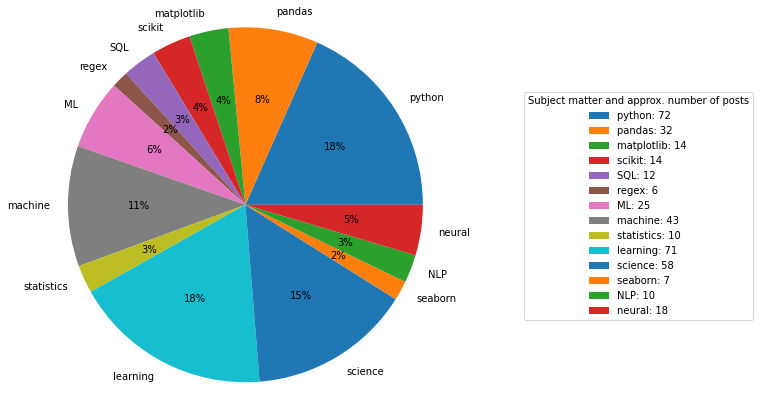

In [2]:
all_cheat_sheet_Topics = forumTopics_df[forumTopics_df['Title'].str.contains("Sheet", case=False, na=False)]

sizes = []
def count(key_word):
    number_occurences = all_cheat_sheet_Topics.Title.str.count(key_word, re.I).sum()
    sizes.append(number_occurences)
    return

topics = ['python','pandas','matplotlib','scikit','SQL','regex','ML','machine','statistics','learning','science','seaborn','NLP','neural']
for word in topics:
    count(word)

import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=topics, autopct='%1.0f%%')
ax1.axis('equal')
ax1.legend(labels=['%s: %i' % (l, s  ) for l, s in zip(topics, sizes)],
          title="Subject matter and approx. number of posts",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0, 1))
plt.show()